In [2]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
import seaborn as sns
seed = 42

|# 1. Data Loading

In [3]:
gauges = pd.read_csv(
	'LamaH-dataset/A_basins_total_upstrm/1_attributes/Catchment_attributes.csv',
	delimiter = ';'
)
gauges.shape

(859, 63)

In [4]:
# randomly take 100 values, as said in slide 40
gauges = gauges.sample(100, random_state=seed).sort_values(by='ID').reset_index()
gauges.head()

,index,ID,area_calc,elev_mean,elev_med,elev_std,elev_ran,slope_mean,mvert_dist,mvert_ang,...,gc_py_fra,gc_sc_fra,gc_sm_fra,gc_ss_fra,gc_su_fra,gc_va_fra,gc_vb_fra,gc_wb_fra,geol_perme,geol_poros
0,23,24,31.153,1480,1476,262,1074,314,6.4,344,...,0.0,1.000,0.000,0.0,0.000,0.0,0.0,0.0,-11.8,0.060
1,30,32,105.084,634,611,133,676,89,19.0,227,...,0.0,0.000,0.599,0.0,0.401,0.0,0.0,0.0,-12.9,0.202
2,39,41,65.206,1403,1337,268,1383,289,11.7,41,...,0.0,1.000,0.000,0.0,0.000,0.0,0.0,0.0,-11.8,0.060
3,49,51,727.403,2125,2200,463,2522,385,45.4,44,...,0.0,0.167,0.004,0.0,0.001,0.0,0.0,0.0,-12.6,0.019
4,63,65,204.351,2155,2200,469,2459,396,20.5,32,...,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.0,-14.1,0.010


# 2. Null Value Analysis

In [5]:
valid_ids = gauges['ID'].array  # hold IDs of all gauges still left for faster calculations later
timeseries = []  # create empty list to hold timeseries data for each gauge

total_nulls = 0

print('[id, nulls]')
for i, id in enumerate(valid_ids):
	timeseriesID = pd.read_csv(
		'LamaH-dataset/A_basins_total_upstrm/2_timeseries/daily/ID_' + str(id) + '.csv',
		delimiter = ';'
	)
	
	temp_nulls = timeseriesID.isnull().sum().sum()

	timeseries.append(timeseriesID)  # append timeseries data to list

	# null value analysis
	print(
		f'[{id:03d}, {temp_nulls:03d}]', 
		end = '\n' if i % 10 == 9 else ''
	)
	
	total_nulls += temp_nulls

print(f'total nulls: {total_nulls}')


[id, nulls]
[024, 000][032, 000][041, 000][051, 000][065, 000][067, 000][068, 000][069, 000][080, 000][088, 000]
[098, 000][112, 000][122, 000][138, 000][139, 000][141, 000][171, 000][177, 000][201, 000][211, 000]
[214, 000][215, 000][230, 000][234, 000][247, 000][263, 000][268, 000][269, 000][289, 000][293, 000]
[295, 000][297, 000][299, 000][309, 000][314, 000][330, 000][331, 000][334, 000][341, 000][354, 000]
[366, 000][372, 000][387, 000][401, 000][402, 000][448, 000][456, 000][458, 000][472, 000][481, 000]
[489, 000][512, 000][516, 000][530, 000][539, 000][540, 000][546, 000][572, 000][575, 000][586, 000]
[587, 000][593, 000][598, 000][619, 000][623, 000][635, 000][641, 000][651, 000][652, 000][658, 000]
[661, 000][667, 000][675, 000][676, 000][683, 000][688, 000][691, 000][693, 000][695, 000][711, 000]
[723, 000][728, 000][733, 000][761, 000][766, 000][771, 000][780, 000][798, 000][809, 000][810, 000]
[831, 000][838, 000][839, 000][847, 000][848, 000][859, 000][869, 000][873, 000

# 3. Statistical Analysis

In this step, only the 1st table will be loaded (guage ID 24) because analysis on 100 seperate tables would be quite messy

In [6]:
# pick the 1st table out for analysis
temp_id = valid_ids[0]  # 24

gaugeseries = timeseries[temp_id].copy()
gaugeseries.columns

Index(['YYYY', 'MM', 'DD', 'DOY', '2m_temp_max', '2m_temp_mean', '2m_temp_min',
       '2m_dp_temp_max', '2m_dp_temp_mean', '2m_dp_temp_min', '10m_wind_u',
       '10m_wind_v', 'fcst_alb', 'lai_high_veg', 'lai_low_veg', 'swe',
       'surf_net_solar_rad_max', 'surf_net_solar_rad_mean',
       'surf_net_therm_rad_max', 'surf_net_therm_rad_mean', 'surf_press',
       'total_et', 'prec', 'volsw_123', 'volsw_4'],
      dtype='object')

In [7]:
gaugeseries.head()


,YYYY,MM,DD,DOY,2m_temp_max,2m_temp_mean,2m_temp_min,2m_dp_temp_max,2m_dp_temp_mean,2m_dp_temp_min,...,swe,surf_net_solar_rad_max,surf_net_solar_rad_mean,surf_net_therm_rad_max,surf_net_therm_rad_mean,surf_press,total_et,prec,volsw_123,volsw_4
0,1981,1,1,1,-5.2,-7.1,-9.4,-8.2,-11.5,-14.3,...,255.74,122,23,57,26,82446,-0.08,7.46,0.24,0.3
1,1981,1,2,2,-7.2,-8.7,-10.0,-9.3,-10.5,-12.3,...,267.91,95,17,29,15,82391,0.09,12.78,0.24,0.3
2,1981,1,3,3,-3.0,-4.9,-7.8,-4.4,-6.3,-9.0,...,280.85,134,26,41,11,81592,0.01,13.96,0.24,0.3
3,1981,1,4,4,-3.5,-5.2,-8.0,-4.5,-6.8,-9.8,...,293.76,118,24,62,30,81095,0.13,9.23,0.24,0.3
4,1981,1,5,5,-8.1,-11.0,-12.2,-10.0,-13.2,-15.5,...,304.57,54,12,69,21,81396,0.31,15.13,0.24,0.3


In [8]:
gauges.head()

,index,ID,area_calc,elev_mean,elev_med,elev_std,elev_ran,slope_mean,mvert_dist,mvert_ang,...,gc_py_fra,gc_sc_fra,gc_sm_fra,gc_ss_fra,gc_su_fra,gc_va_fra,gc_vb_fra,gc_wb_fra,geol_perme,geol_poros
0,23,24,31.153,1480,1476,262,1074,314,6.4,344,...,0.0,1.000,0.000,0.0,0.000,0.0,0.0,0.0,-11.8,0.060
1,30,32,105.084,634,611,133,676,89,19.0,227,...,0.0,0.000,0.599,0.0,0.401,0.0,0.0,0.0,-12.9,0.202
2,39,41,65.206,1403,1337,268,1383,289,11.7,41,...,0.0,1.000,0.000,0.0,0.000,0.0,0.0,0.0,-11.8,0.060
3,49,51,727.403,2125,2200,463,2522,385,45.4,44,...,0.0,0.167,0.004,0.0,0.001,0.0,0.0,0.0,-12.6,0.019
4,63,65,204.351,2155,2200,469,2459,396,20.5,32,...,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.0,-14.1,0.010


In [9]:
print(f'year range: {min(gaugeseries["YYYY"])} - {max(gaugeseries["YYYY"])}')

year range: 1981 - 2019


In [10]:
# convert date columns into datetime for better plotting
gaugeseries.insert(0, 'date', pd.to_datetime(
	gaugeseries[['YYYY', 'MM', 'DD']].rename(columns={'YYYY': 'year', 'MM': 'month', 'DD': 'day'})
))


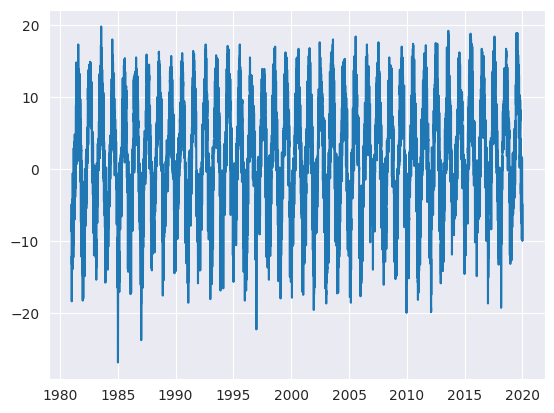

In [11]:
# 2m_temp_mean: Air temperature at a height of 2 m above Earth surface in Celsius
plot('date', '2m_temp_mean', data=gaugeseries)

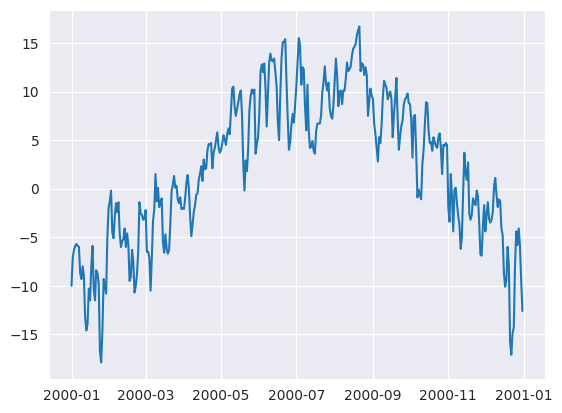

In [12]:
plot('date', '2m_temp_mean', data=gaugeseries[gaugeseries['YYYY'] == 2000])


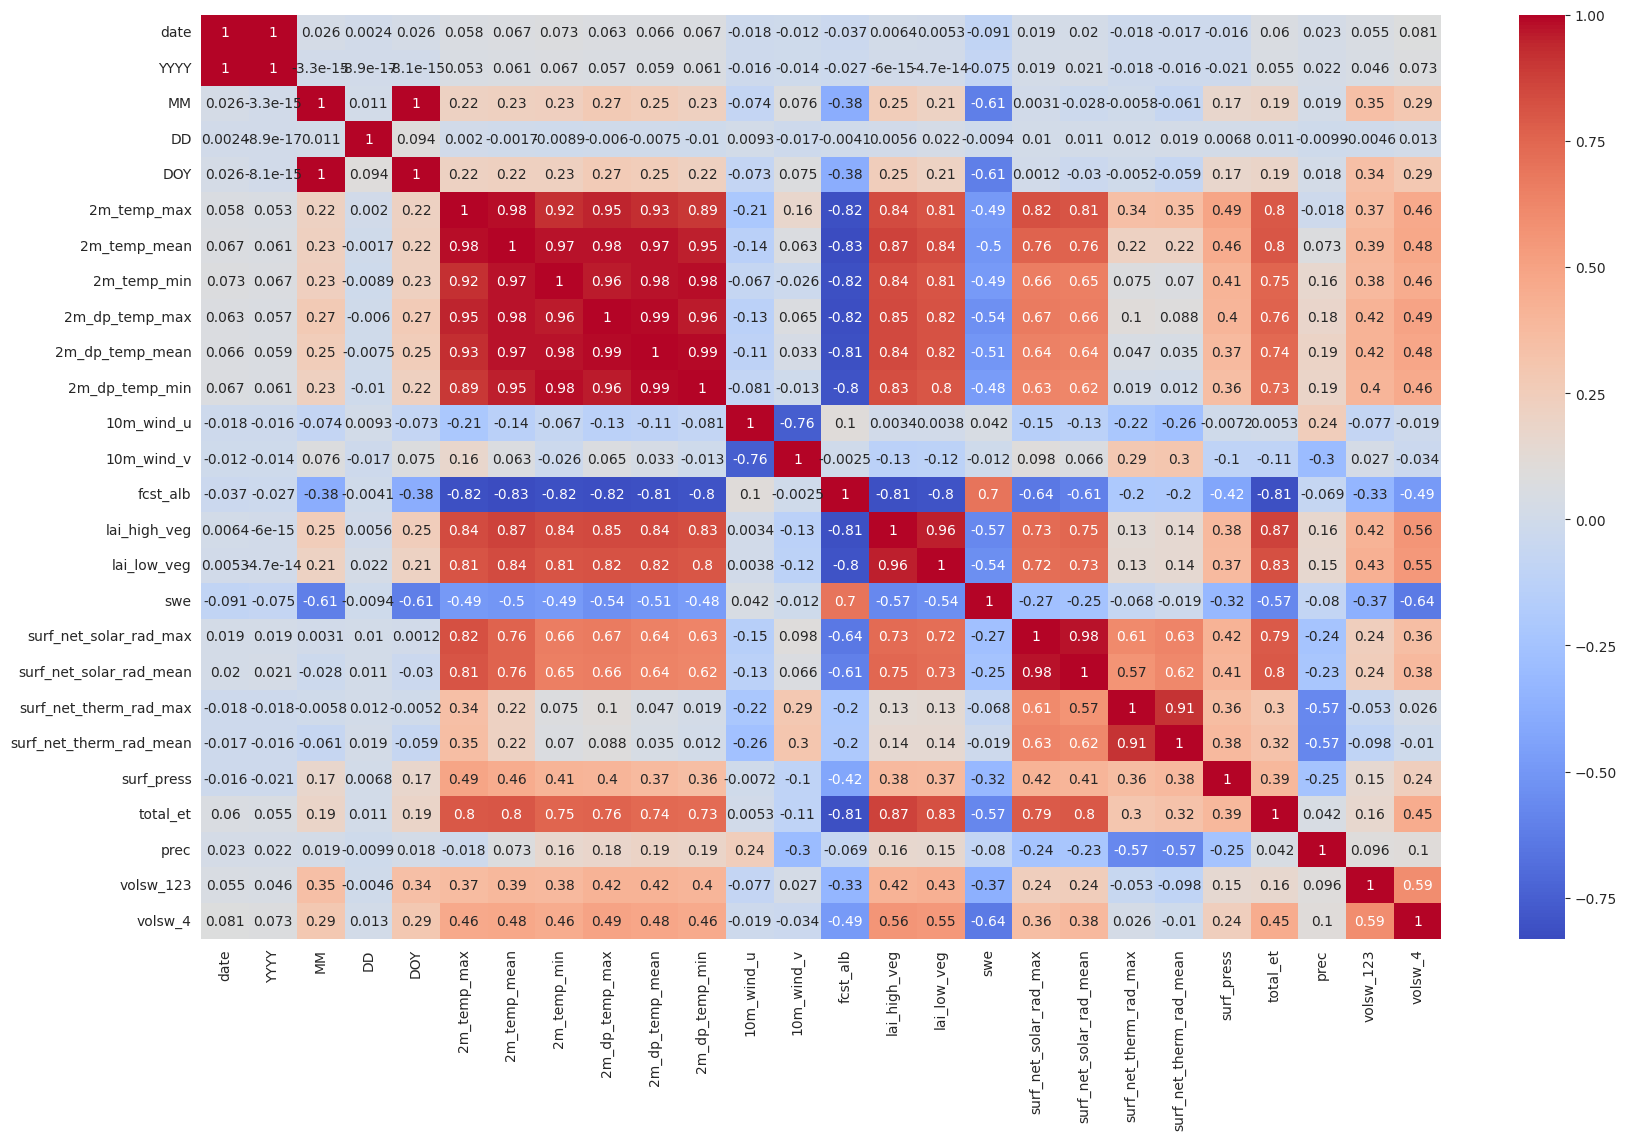

In [13]:
# create a correlation matrix of each column
plt.figure(figsize=(20, 12))
sns.heatmap(gaugeseries.corr(), annot=True, cmap='coolwarm')
plt.show()

/tmp/ipykernel_13070/2712472928.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  gaugeseries.hist(ax=axis)


array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'YYYY'}>, <Axes: title={'center': 'MM'}>,
        <Axes: title={'center': 'DD'}>, <Axes: title={'center': 'DOY'}>],
       [<Axes: title={'center': '2m_temp_max'}>,
        <Axes: title={'center': '2m_temp_mean'}>,
        <Axes: title={'center': '2m_temp_min'}>,
        <Axes: title={'center': '2m_dp_temp_max'}>,
        <Axes: title={'center': '2m_dp_temp_mean'}>],
       [<Axes: title={'center': '2m_dp_temp_min'}>,
        <Axes: title={'center': '10m_wind_u'}>,
        <Axes: title={'center': '10m_wind_v'}>,
        <Axes: title={'center': 'fcst_alb'}>,
        <Axes: title={'center': 'lai_high_veg'}>],
       [<Axes: title={'center': 'lai_low_veg'}>,
        <Axes: title={'center': 'swe'}>,
        <Axes: title={'center': 'surf_net_solar_rad_max'}>,
        <Axes: title={'center': 'surf_net_solar_rad_mean'}>,
        <Axes: title={'center': 'surf_net_therm_rad_max'}>],
       [<Axes: title={'center': 'surf_n

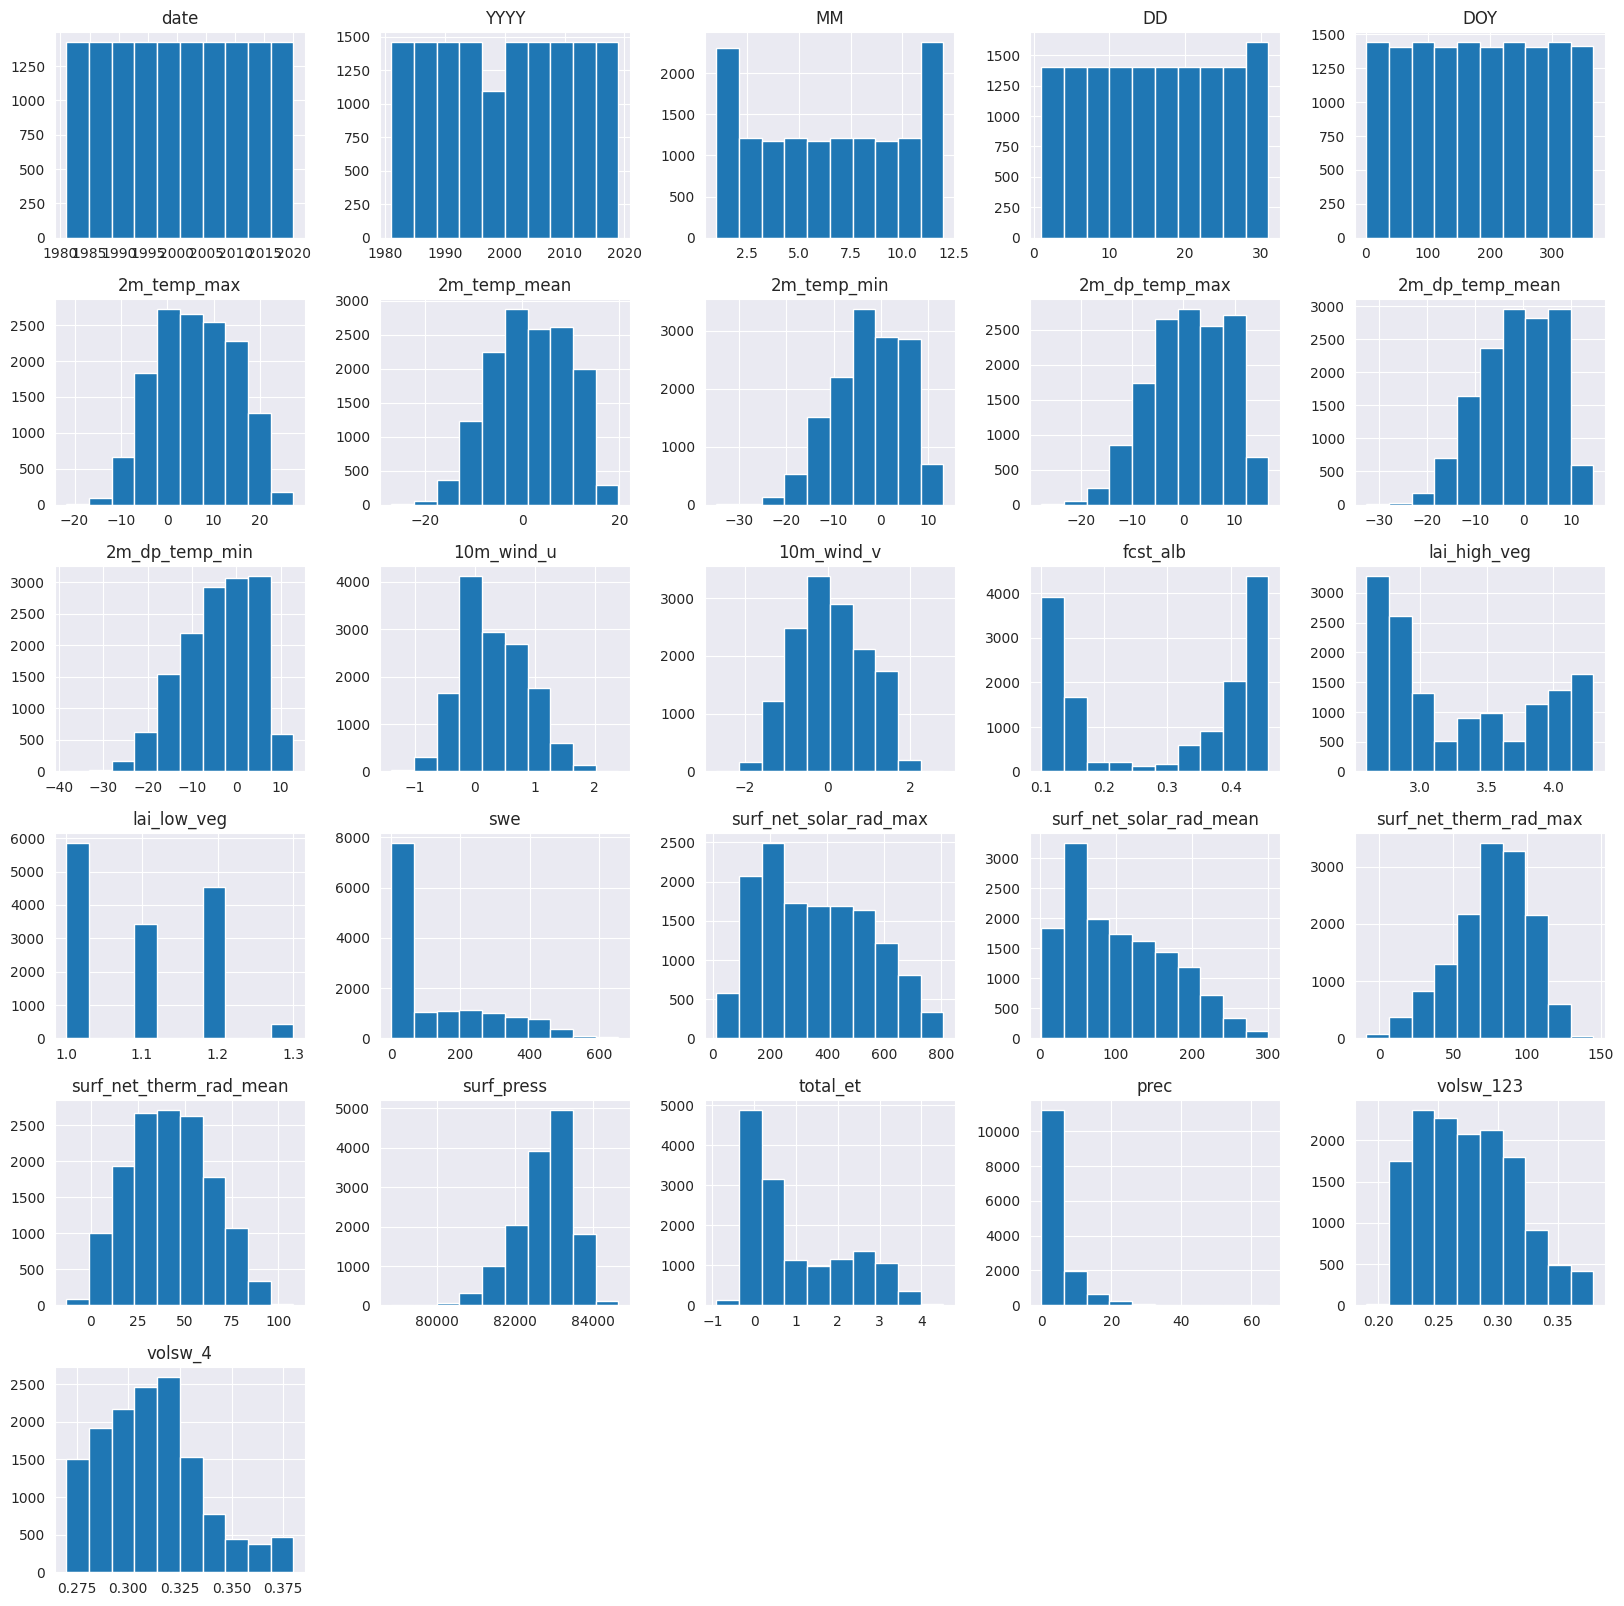

In [14]:
import matplotlib.pyplot as plt

#define format for subplots (1 row and 3 columns)
fig, axis = plt.subplots(figsize=(20, 20))

gaugeseries.hist(ax=axis)

# 4. Data Pre-processing

In [15]:
gaugeseries = gaugeseries.drop(["YYYY", "MM", "DD", "DOY"], axis=1)

### Checking for outliers

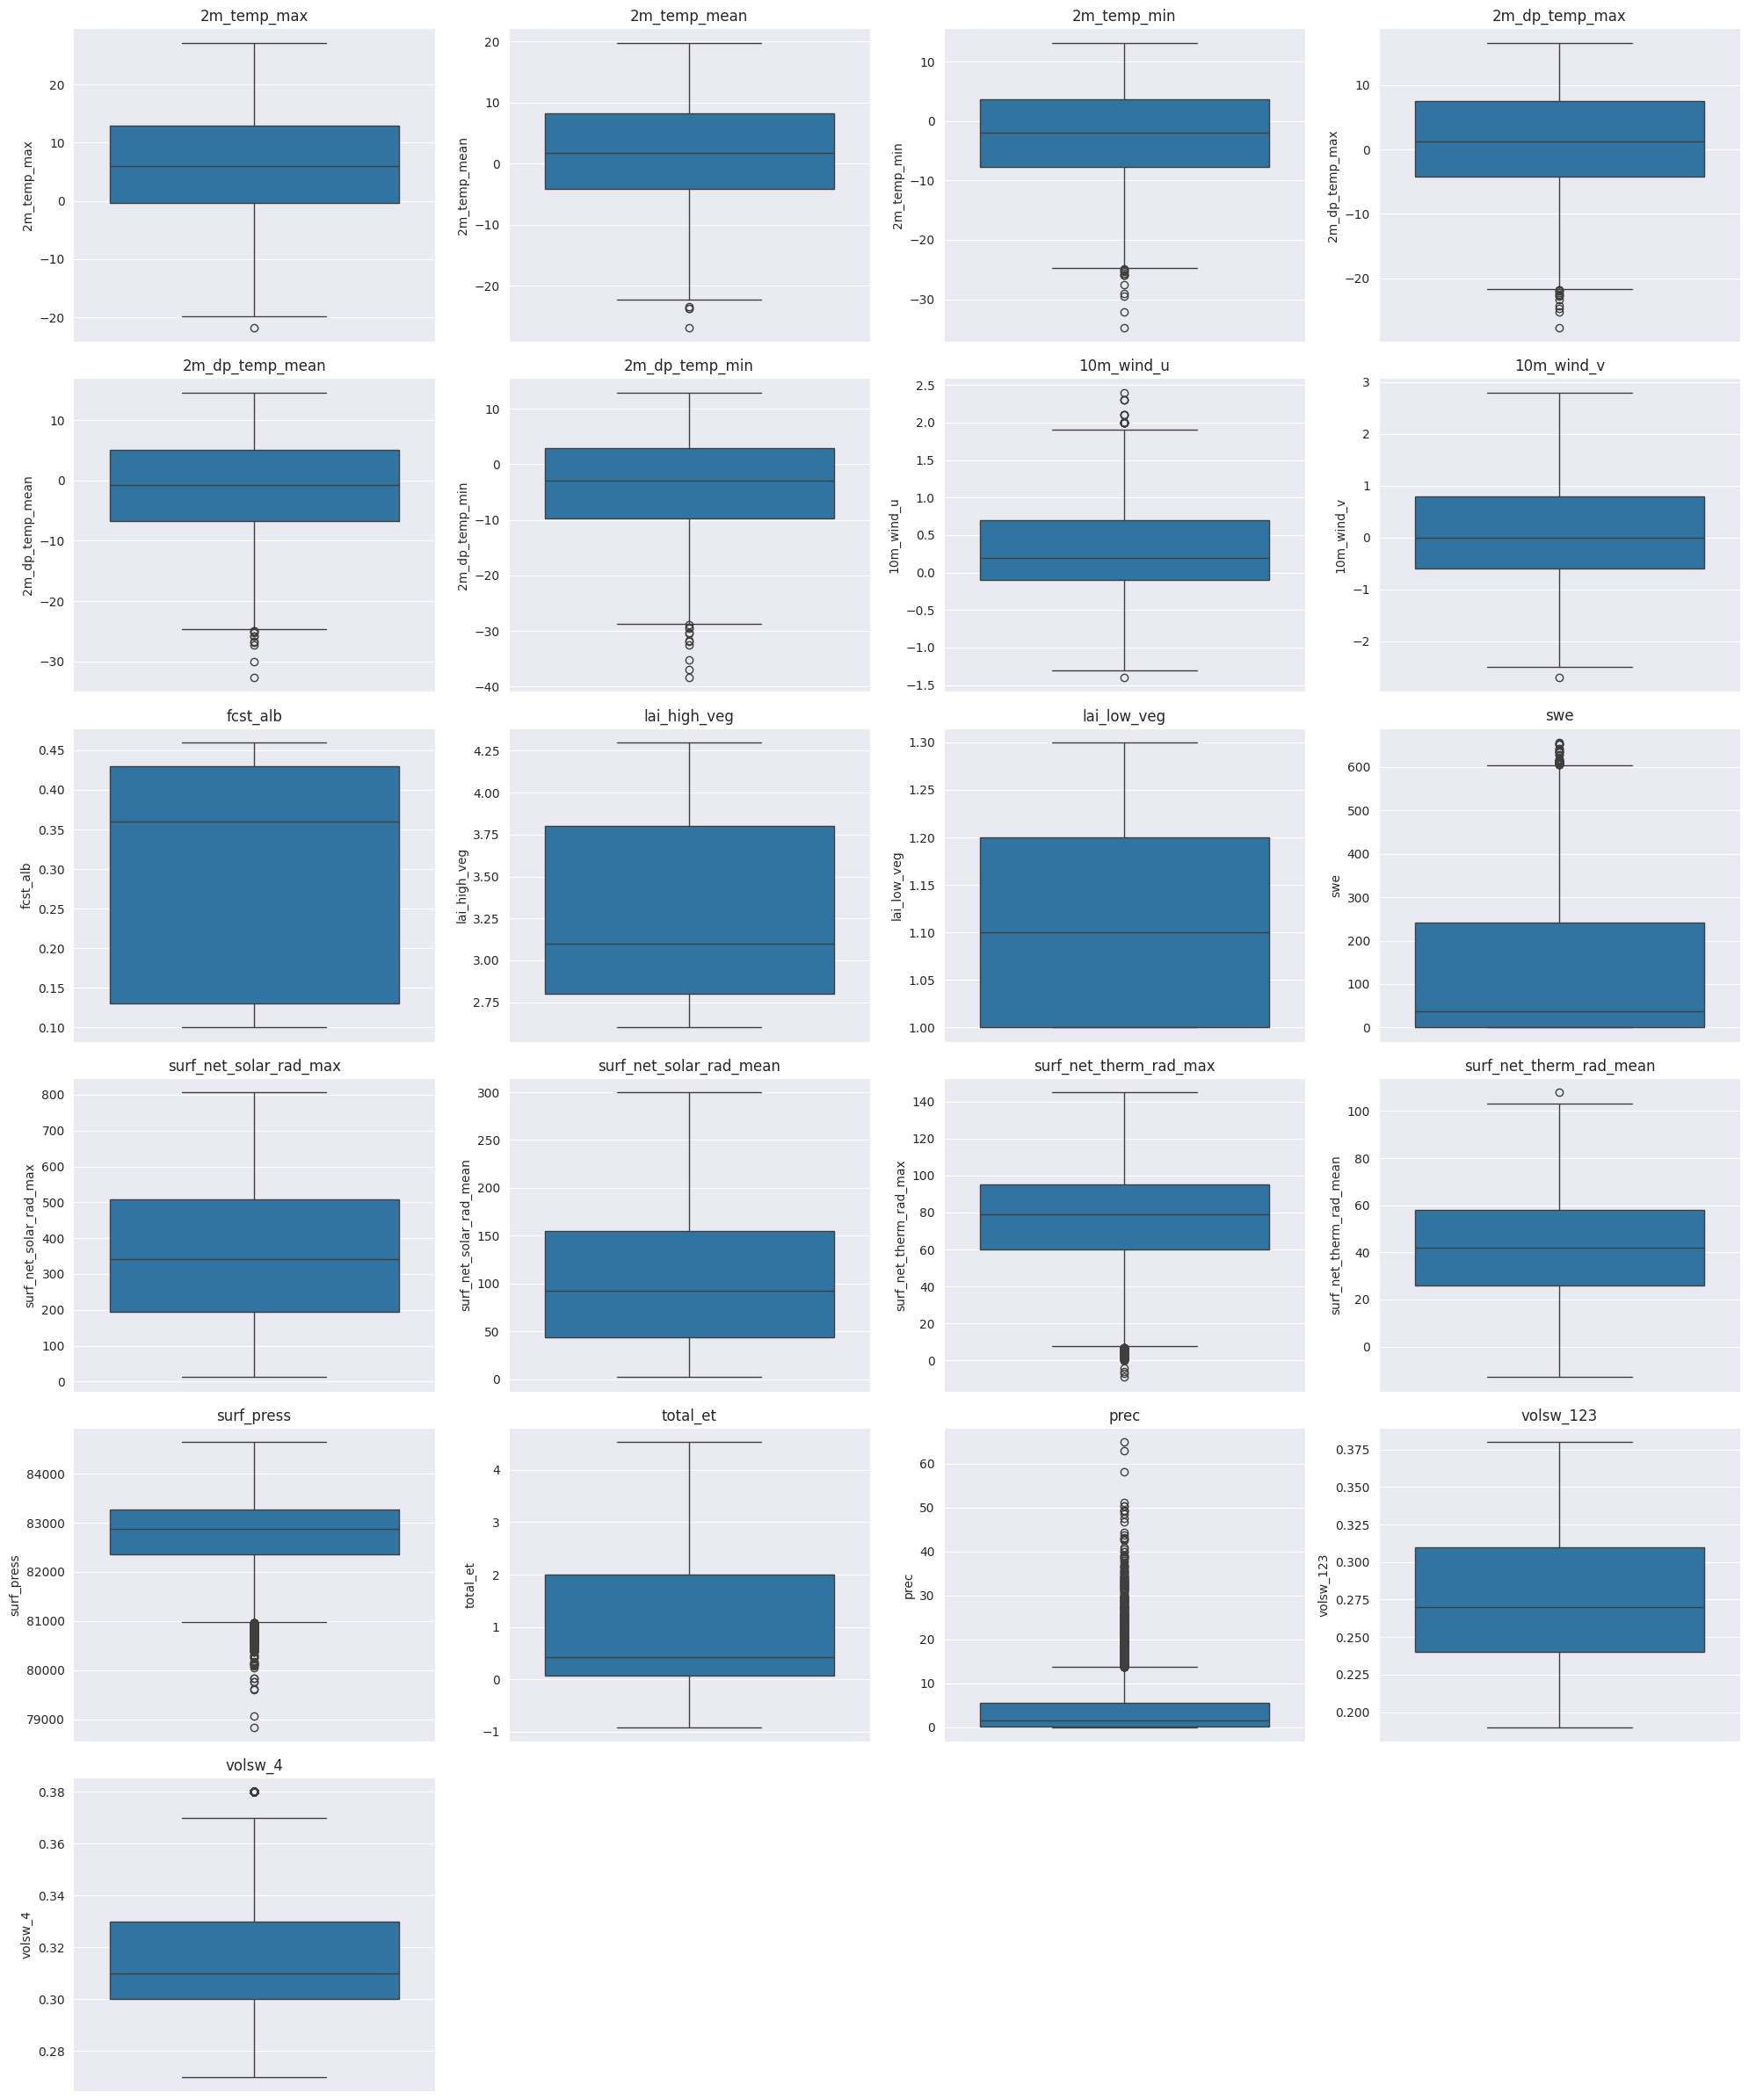

In [16]:
numerical_cols = gaugeseries.select_dtypes(include=['number']).columns

n_cols = 4
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols 

plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Iterate over only the numerical columns
for i, col in enumerate(numerical_cols):
	plt.subplot(n_rows, n_cols, i + 1)
	sns.boxplot(y=gaugeseries[col])
	plt.title(col)

plt.tight_layout()
plt.show()

### Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

date_column = gaugeseries['date'] 
data_to_scale = gaugeseries.drop(columns=['date'])

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_to_scale)

scaled_df = pd.DataFrame(scaled_data, columns=data_to_scale.columns)

scaled_df['date'] = date_column

scaled_df = scaled_df[['date'] + [col for col in scaled_df.columns if col != 'date']] # moving it at first place

scaled_df.head()

,date,2m_temp_max,2m_temp_mean,2m_temp_min,2m_dp_temp_max,2m_dp_temp_mean,2m_dp_temp_min,10m_wind_u,10m_wind_v,fcst_alb,...,swe,surf_net_solar_rad_max,surf_net_solar_rad_mean,surf_net_therm_rad_max,surf_net_therm_rad_mean,surf_press,total_et,prec,volsw_123,volsw_4
0,1981-01-01,0.338776,0.423983,0.529167,0.440181,0.448203,0.469786,0.815789,0.309091,0.944444,...,0.389302,0.138365,0.070470,0.428571,0.322314,0.621426,0.152574,0.114964,0.263158,0.272727
1,1981-01-02,0.297959,0.389722,0.516667,0.415350,0.469345,0.508772,0.815789,0.345455,0.972222,...,0.407827,0.104403,0.050336,0.246753,0.231405,0.611953,0.183824,0.196949,0.263158,0.272727
2,1981-01-03,0.383673,0.471092,0.562500,0.525959,0.558140,0.573099,0.631579,0.509091,0.972222,...,0.427525,0.153459,0.080537,0.324675,0.198347,0.474337,0.169118,0.215133,0.263158,0.272727
3,1981-01-04,0.373469,0.464668,0.558333,0.523702,0.547569,0.557505,0.684211,0.327273,0.972222,...,0.447178,0.133333,0.073826,0.461039,0.355372,0.388736,0.191176,0.142241,0.263158,0.272727
4,1981-01-05,0.279592,0.340471,0.470833,0.399549,0.412262,0.446394,0.815789,0.236364,1.000000,...,0.463633,0.052830,0.033557,0.506494,0.280992,0.440579,0.224265,0.233164,0.263158,0.272727


# Saving the dataframes

In [18]:
# save temporary table to build models
gaugeseries.to_csv('data_temp/gauge' + str(temp_id) + '.csv')
scaled_df.to_csv('data_temp/gauge' + str(temp_id) + 'scaled.csv')

# Creating the howl Dataset 

In [19]:
Catchment_attributes = pd.read_csv(
	'LamaH-dataset/A_basins_total_upstrm/1_attributes/Catchment_attributes.csv',
	delimiter = ';'
)

Stream_dist = pd.read_csv(
	'LamaH-dataset/A_basins_total_upstrm/1_attributes/Stream_dist.csv',
	delimiter = ';'
)

Water_balance = pd.read_csv(
	'LamaH-dataset/A_basins_total_upstrm/1_attributes/Water_balance.csv',
	delimiter = ';'
)

In [20]:
for i, id in enumerate(valid_ids):
    Catchment_attributesID = Catchment_attributes[Catchment_attributes['ID'] == id]
    Stream_distID = Stream_dist[Stream_dist['ID'] == id]
    Water_balanceID = Water_balance[Water_balance['ID'] == id]

    location_info = pd.merge(Catchment_attributesID, Stream_distID, on='ID')
    location_info = pd.merge(location_info, Water_balanceID, on='ID')

    timeseries[i].loc[:, location_info.columns] = location_info.loc[0].values



In [21]:
dataset = pd.concat(timeseries, ignore_index=True)

In [22]:
dataset.head()

,YYYY,MM,DD,DOY,2m_temp_max,2m_temp_mean,2m_temp_min,2m_dp_temp_max,2m_dp_temp_mean,2m_dp_temp_min,...,dist_hup,P,PCRPS,PERA5,PMSW,PET,ET0,ETA,Q1,Q2
0,1981,1,1,1,-2.5,-5.3,-8.0,-4.1,-7.3,-11.2,...,8.0,5.27,4.65,5.06,4.69,6.34,2.29,1.38,5.71,5.89
1,1981,1,2,2,-3.4,-5.2,-6.7,-5.0,-6.9,-7.8,...,8.0,5.27,4.65,5.06,4.69,6.34,2.29,1.38,5.71,5.89
2,1981,1,3,3,0.8,-0.8,-3.1,-0.2,-3.2,-4.8,...,8.0,5.27,4.65,5.06,4.69,6.34,2.29,1.38,5.71,5.89
3,1981,1,4,4,0.4,-2.5,-6.3,-0.2,-3.0,-7.2,...,8.0,5.27,4.65,5.06,4.69,6.34,2.29,1.38,5.71,5.89
4,1981,1,5,5,-7.1,-8.1,-8.6,-8.4,-9.3,-9.9,...,8.0,5.27,4.65,5.06,4.69,6.34,2.29,1.38,5.71,5.89


In [23]:
attribute_list = dataset.columns.tolist()
print(attribute_list)

['YYYY', 'MM', 'DD', 'DOY', '2m_temp_max', '2m_temp_mean', '2m_temp_min', '2m_dp_temp_max', '2m_dp_temp_mean', '2m_dp_temp_min', '10m_wind_u', '10m_wind_v', 'fcst_alb', 'lai_high_veg', 'lai_low_veg', 'swe', 'surf_net_solar_rad_max', 'surf_net_solar_rad_mean', 'surf_net_therm_rad_max', 'surf_net_therm_rad_mean', 'surf_press', 'total_et', 'prec', 'volsw_123', 'volsw_4', 'ID', 'area_calc', 'elev_mean', 'elev_med', 'elev_std', 'elev_ran', 'slope_mean', 'mvert_dist', 'mvert_ang', 'elon_ratio', 'strm_dens', 'p_mean', 'et0_mean', 'eta_mean', 'arid_1', 'arid_2', 'p_season', 'frac_snow', 'hi_prec_fr', 'hi_prec_du', 'hi_prec_ti', 'lo_prec_fr', 'lo_prec_du', 'lo_prec_ti', 'lc_dom', 'agr_fra', 'bare_fra', 'forest_fra', 'glac_fra', 'lake_fra', 'urban_fra', 'lai_max', 'lai_diff', 'ndvi_max', 'ndvi_min', 'gvf_max', 'gvf_diff', 'bedrk_dep', 'root_dep', 'soil_poros', 'soil_condu', 'soil_tawc', 'sand_fra', 'silt_fra', 'clay_fra', 'grav_fra', 'oc_fra', 'gc_dom', 'gc_ig_fra', 'gc_mt_fra', 'gc_pa_fra', 'gc

In [24]:
dataset['Date'] = pd.to_datetime(dataset[['YYYY', 'MM', 'DD']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d')

In [25]:
dataset = dataset.drop(['YYYY', 'MM', 'DD', 'DOY'], axis=1)

In [26]:
dataset = dataset.sort_values(by='Date')

In [27]:
dataset['Timestamp'] = pd.to_datetime(dataset['Date']).astype('int64') // 10**9

In [28]:
dataset.isnull().sum()


2m_temp_max             0
2m_temp_mean            0
2m_temp_min             0
2m_dp_temp_max          0
2m_dp_temp_mean         0
                    ...  
ETA                     0
Q1                 227904
Q2                      0
Date                    0
Timestamp               0
Length: 96, dtype: int64

In [29]:
dataset = dataset.drop(['hi_prec_ti', 'lo_prec_ti', 'geol_perme', 'Q1', 'gc_dom', 'Date'], axis=1)

In [30]:
dataset.isnull().sum().sum()

0

In [31]:
dataset.shape

(1424400, 90)

In [32]:
dataset.to_csv('data_temp/100_gauge.csv', index=False)